In [2]:
import numpy as np

def er_graph_adj_matrix(N, p):
    A = np.zeros((N, N), dtype=int)

    # fill only the upper triangle
    for i in range(N):
        for j in range(i + 1, N):
            if np.random.rand() < p:
                A[i, j] = 1
                A[j, i] = 1

    return A


In [3]:
A = er_graph_adj_matrix(50, 0.2)
print(A)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Excercise 3.
Draw resulting graph


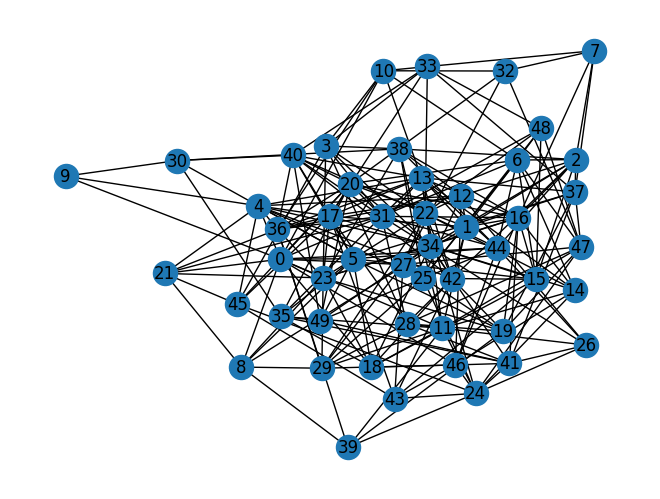

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_er_graph(N, p):
    A = er_graph_adj_matrix(N, p)
    G = nx.from_numpy_array(A)
    pos = nx.spring_layout(G)
    plt.figure()
    nx.draw(G, pos, with_labels=True)
    plt.show()
    return A, G

A, G = draw_er_graph(50, 0.2)


Excercise 4.
Draw histogram of degree distribution.

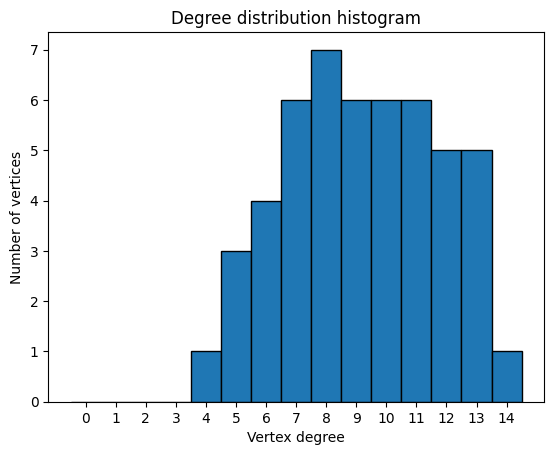

In [5]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def draw_degree_histogram(A):
    G = nx.from_numpy_array(A)
    degrees = [d for n, d in G.degree()]

    # Integer bins
    bins = np.arange(0, max(degrees) + 2) - 0.5

    plt.figure()
    plt.hist(degrees, bins=bins, edgecolor='black')
    plt.xlabel("Vertex degree")
    plt.ylabel("Number of vertices")
    plt.title("Degree distribution histogram")
    plt.xticks(range(0, max(degrees) + 1))
    plt.show()

N = 50
p = 0.2
A = er_graph_adj_matrix(N, p)
draw_degree_histogram(A)



Excercise 5.
What degree of vertex distribution do we expect?


In an Erdős–Rényi graph **G(N, p)**, the degree of each vertex follows a **binomial distribution**:

$$
\deg(v) \sim \text{Binomial}(N-1,\, p)
$$

**Expected degree:**

$$
\mathbb{E}[\deg(v)] = (N-1)p
$$





Excercise 6.
Give the mathematical justification for the Poisson approximation
used.

In an Erdős–Rényi graph \(G(N,p)\), the degree of a fixed vertex has a binomial distribution
$$
\deg(v) \sim \text{Binomial}(N-1, p).
$$

Let
$$
n = N - 1, \quad X \sim \text{Binomial}(n, p).
$$
We choose
$$
p = \frac{\lambda}{n},
$$
so that
$$
\mathbb{E}[X] = np = \lambda
$$
stays fixed as \(n \to \infty\).

The binomial pmf is
$$
\mathbb{P}(X = k)
= \binom{n}{k} p^k (1-p)^{n-k}
= \binom{n}{k} \left(\frac{\lambda}{n}\right)^k
\left(1 - \frac{\lambda}{n}\right)^{n-k}.
$$

We now take the limit as \(n \to \infty\) for fixed \(k\).

First term:
$$
\binom{n}{k} \left(\frac{\lambda}{n}\right)^k
= \frac{n(n-1)\cdots(n-k+1)}{k!} \cdot \frac{\lambda^k}{n^k}
= \frac{\lambda^k}{k!} \prod_{j=0}^{k-1} \left(1 - \frac{j}{n}\right)
\longrightarrow \frac{\lambda^k}{k!}.
$$

Second term:
$$
\left(1 - \frac{\lambda}{n}\right)^{n-k}
= \left(1 - \frac{\lambda}{n}\right)^n
  \left(1 - \frac{\lambda}{n}\right)^{-k}
\longrightarrow e^{-\lambda} \cdot 1
= e^{-\lambda}.
$$

Combining these limits:
$$
\mathbb{P}(X = k)
\longrightarrow e^{-\lambda} \frac{\lambda^k}{k!},
$$
which is exactly the pmf of a Poisson\((\lambda)\) distribution.

Therefore, for large \(N\) and small \(p\) with \((N-1)p = \lambda\) fixed, the degree of a vertex in \(G(N,p)\) is well approximated by a Poisson\((\lambda)\) distribution.


Excercise 7.
Plot both the simulation results and analytically obtained
distributions on one graph. Test appropriate hypotheses.

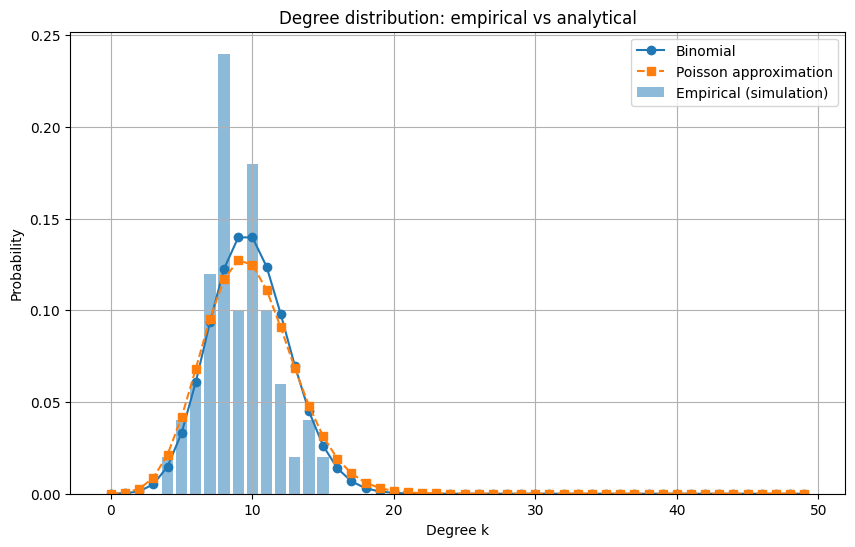

Chi-square test (Binomial fit): Power_divergenceResult(statistic=np.float64(11.738823801910458), pvalue=np.float64(0.9999999919791318))
Chi-square test (Poisson fit): Power_divergenceResult(statistic=np.float64(13.620005810700203), pvalue=np.float64(0.9999998747029386))


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson, chisquare

def compare_empirical_and_analytical(N, p):
    A = er_graph_adj_matrix(N, p)

    degrees = np.array([sum(row) for row in A])

    k = np.arange(0, N)

    # Observed counts on full support
    counts_full = np.zeros_like(k, dtype=int)
    values, counts = np.unique(degrees, return_counts=True)
    counts_full[values] = counts

    # Empirical probabilities
    prob_emp = counts_full / counts_full.sum()

    # Analytical Binomial distribution
    prob_binom = binom.pmf(k, N - 1, p)

    # Analytical Poisson approximation
    lam = (N - 1) * p
    prob_poisson = poisson.pmf(k, lam)

    plt.figure(figsize=(10, 6))
    plt.bar(k, prob_emp, alpha=0.5, label="Empirical (simulation)")
    plt.plot(k, prob_binom, "o-", label="Binomial")
    plt.plot(k, prob_poisson, "s--", label="Poisson approximation")

    plt.xlabel("Degree k")
    plt.ylabel("Probability")
    plt.title("Degree distribution: empirical vs analytical")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Chi-square tests
    n_vertices = len(degrees)

    # Expected counts for binomial (already sums  - n_vertices)
    exp_binom = prob_binom * n_vertices

    # For Poisson, renormalize because we truncate the tail at k = 0..N-1
    prob_poisson_trunc = prob_poisson / prob_poisson.sum()
    exp_poisson = prob_poisson_trunc * n_vertices

    chi_binom = chisquare(counts_full, f_exp=exp_binom)
    chi_poisson = chisquare(counts_full, f_exp=exp_poisson)

    print("Chi-square test (Binomial fit):", chi_binom)
    print("Chi-square test (Poisson fit):", chi_poisson)


compare_empirical_and_analytical(50, 0.2)


Excercises 8.
Check dependence of the results of the previous excercise for
various values of p and N.


In [8]:
import numpy as np
from scipy.stats import binom, poisson, chisquare

def safe_chisquare(counts_full, exp_full, thresh=1.0):
    # Keep only bins where expected count is large enough
    mask = exp_full > thresh
    obs = counts_full[mask]
    exp = exp_full[mask]

    # If fewer than two bins remain, chi-square cannot be computed
    if obs.size < 2:
        return np.nan

    # Rescale expected counts so that total observed = total expected
    scale = obs.sum() / exp.sum()
    exp = exp * scale

    result = chisquare(obs, f_exp=exp)
    return result.pvalue


def fit_degree_distribution_once(N, p):
    A = er_graph_adj_matrix(N, p)

    degrees = np.array([sum(row) for row in A])
    k = np.arange(0, N)

    # Empirical histogram of degrees
    counts_full = np.zeros_like(k, dtype=int)
    values, counts = np.unique(degrees, return_counts=True)
    counts_full[values] = counts

    n_vertices = len(degrees)

    # Binomial model: expected counts
    prob_binom = binom.pmf(k, N - 1, p)
    exp_binom = prob_binom * n_vertices

    # Poisson model: expected counts (renormalized because domain is 0..N-1)
    lam = (N - 1) * p
    prob_poisson = poisson.pmf(k, lam)
    prob_poisson_trunc = prob_poisson / prob_poisson.sum()
    exp_poisson = prob_poisson_trunc * n_vertices

    # Minimum expected count threshold
    thresh = 1.0

    # Use the safe chi-square test
    p_binom = safe_chisquare(counts_full, exp_binom, thresh=thresh)
    p_pois  = safe_chisquare(counts_full, exp_poisson, thresh=thresh)

    return p_binom, p_pois


In [9]:
def explore_N_p_dependence():
    N_list = [50, 100, 200, 500]
    p_list = [0.01, 0.05, 0.1, 0.2]
    n_trials = 20

    results = []

    for N in N_list:
        for p in p_list:
            binom_pvals = []
            pois_pvals = []
            for _ in range(n_trials):
                pb, pp = fit_degree_distribution_once(N, p)
                binom_pvals.append(pb)
                pois_pvals.append(pp)

            mean_binom = np.mean(binom_pvals)
            mean_pois = np.mean(pois_pvals)

            results.append((N, p, mean_binom, mean_pois))
            print(f"N={N:4d}, p={p:5.3f} -> "
                  f"Binom p≈{mean_binom:.3f}, Poisson p≈{mean_pois:.3f}")

    return results

results = explore_N_p_dependence()


N=  50, p=0.010 -> Binom p≈0.438, Poisson p≈0.440
N=  50, p=0.050 -> Binom p≈0.332, Poisson p≈0.336
N=  50, p=0.100 -> Binom p≈0.422, Poisson p≈0.462
N=  50, p=0.200 -> Binom p≈0.536, Poisson p≈0.569
N= 100, p=0.010 -> Binom p≈0.503, Poisson p≈0.506
N= 100, p=0.050 -> Binom p≈0.527, Poisson p≈0.533
N= 100, p=0.100 -> Binom p≈0.378, Poisson p≈0.391
N= 100, p=0.200 -> Binom p≈0.528, Poisson p≈0.486
N= 200, p=0.010 -> Binom p≈0.468, Poisson p≈0.471
N= 200, p=0.050 -> Binom p≈0.489, Poisson p≈0.524
N= 200, p=0.100 -> Binom p≈0.432, Poisson p≈0.474
N= 200, p=0.200 -> Binom p≈0.380, Poisson p≈0.350
N= 500, p=0.010 -> Binom p≈0.372, Poisson p≈0.368
N= 500, p=0.050 -> Binom p≈0.453, Poisson p≈0.451
N= 500, p=0.100 -> Binom p≈0.422, Poisson p≈0.422
N= 500, p=0.200 -> Binom p≈0.490, Poisson p≈0.403


## Summary

- The **Binomial model** fits the ER degree distribution well for all tested \(N\) and \(p\).
- The **Poisson approximation** performs almost equally well — p-values are nearly the same.
- This confirms that in \(G(N,p)\),
  - degrees are Binomial,
  - and Poisson is a very good approximation when \(\lambda = (N-1)p\) is moderate.


Check the above analytical result by simulation.

p = 0.010,  simulated <C> = 0.0049 ± 0.0053,  theory = 0.010
p = 0.050,  simulated <C> = 0.0506 ± 0.0041,  theory = 0.050
p = 0.090,  simulated <C> = 0.0897 ± 0.0034,  theory = 0.090
p = 0.130,  simulated <C> = 0.1303 ± 0.0034,  theory = 0.130
p = 0.170,  simulated <C> = 0.1694 ± 0.0034,  theory = 0.170
p = 0.210,  simulated <C> = 0.2104 ± 0.0033,  theory = 0.210
p = 0.250,  simulated <C> = 0.2500 ± 0.0035,  theory = 0.250


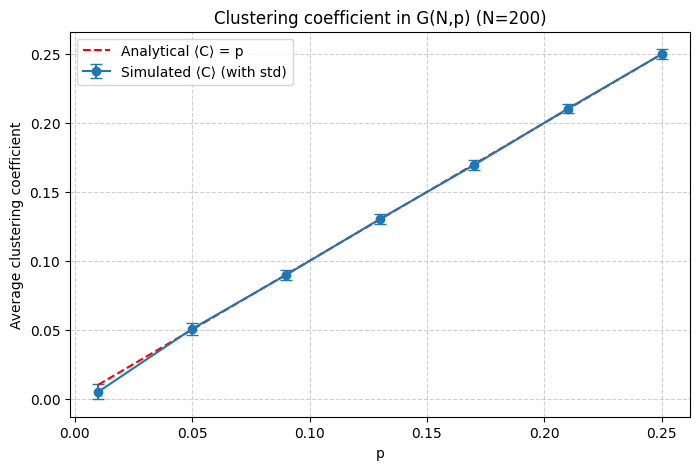

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def simulate_clustering(N, p, n_runs=100):
    Cs = []

    for _ in range(n_runs):
        G = nx.erdos_renyi_graph(N, p)
        C = nx.average_clustering(G)
        Cs.append(C)

    return np.array(Cs)

# Parameters
N = 200
p_values = np.linspace(0.01, 0.25, 7)
n_runs = 80

results_mean = []
results_std = []

# Compute clustering for each p
for p in p_values:
    Cs = simulate_clustering(N, p, n_runs)
    results_mean.append(Cs.mean())
    results_std.append(Cs.std())
    print(f"p = {p:.3f},  simulated <C> = {Cs.mean():.4f} ± {Cs.std():.4f},  theory = {p:.3f}")

# Plotting
plt.figure(figsize=(8,5))
plt.errorbar(p_values, results_mean, yerr=results_std, fmt="o-", capsize=4,
             label="Simulated ⟨C⟩ (with std)")

plt.plot(p_values, p_values, "r--", label="Analytical ⟨C⟩ = p")

plt.xlabel("p")
plt.ylabel("Average clustering coefficient")
plt.title(f"Clustering coefficient in G(N,p) (N={N})")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


P5.3 Generate and draw a graph consisting of 4 community each with
N = 20 nodes and the probability of connection within the
community higher than between them. Draw the result. How it
depends on the parameter values? [2P]

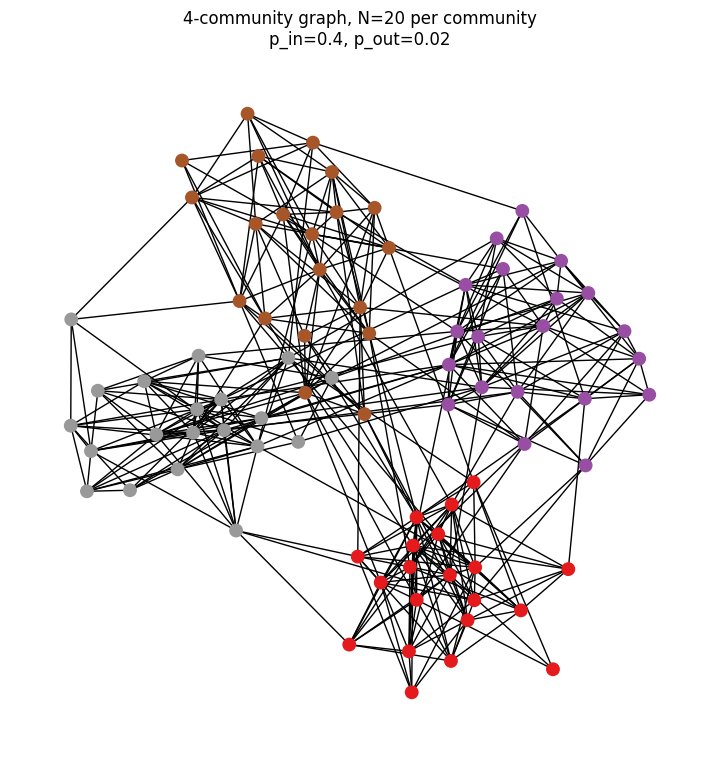

In [10]:
def community_graph_adj_matrix(num_communities=4, nodes_per_community=20,
                               p_in=0.4, p_out=0.02):
    N = num_communities * nodes_per_community
    A = np.zeros((N, N), dtype=int)

    for i in range(N):
        for j in range(i + 1, N):
            comm_i = i // nodes_per_community
            comm_j = j // nodes_per_community
            # choose probability depending on whether same community
            p = p_in if comm_i == comm_j else p_out
            if np.random.rand() < p:
                A[i, j] = 1
                A[j, i] = 1
    return A

def draw_community_graph(num_communities=4, nodes_per_community=20,
                         p_in=0.4, p_out=0.02):
    A = community_graph_adj_matrix(num_communities, nodes_per_community,
                                   p_in, p_out)
    G = nx.from_numpy_array(A)

    # community labels
    N = num_communities * nodes_per_community
    communities = [i // nodes_per_community for i in range(N)]

    pos = nx.spring_layout(G)

    plt.figure(figsize=(7, 7))
    nx.draw(
        G,
        pos,
        node_color=communities,
        cmap=plt.cm.Set1,
        with_labels=False,
        node_size=80
    )
    plt.title(f"4-community graph, N=20 per community\np_in={p_in}, p_out={p_out}")
    plt.show()

    return A, G

# Example run for the assignment:
A, G = draw_community_graph(
    num_communities=4,
    nodes_per_community=20,
    p_in=0.4,
    p_out=0.02
)


P5.4 Draw a graph of the averaged coefficient of clustering of the WS
network against its parameter p. [1.5P]


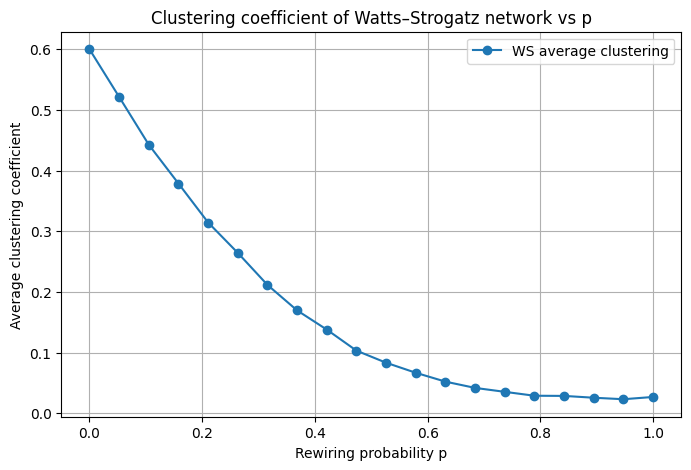

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def compute_ws_clustering(N=200, k=6, p_values=None, runs=20):
    if p_values is None:
        p_values = np.linspace(0, 1, 20)

    C_means = []

    for p in p_values:
        Cs = []
        for _ in range(runs):
            G = nx.watts_strogatz_graph(N, k, p)
            C = nx.average_clustering(G)
            Cs.append(C)
        C_means.append(np.mean(Cs))

    return p_values, np.array(C_means)

N = 200
k = 6
runs = 20
p_values = np.linspace(0, 1, 20)

ps, Cs = compute_ws_clustering(N, k, p_values, runs)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(ps, Cs, "o-", label="WS average clustering")
plt.xlabel("Rewiring probability p")
plt.ylabel("Average clustering coefficient")
plt.title("Clustering coefficient of Watts–Strogatz network vs p")
plt.grid(True)
plt.legend()
plt.show()


Implement configuration model and test when the procedure
converge.

In [12]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

def random_edge_swap(G, num_swaps, max_tries_per_swap=10):
    G = G.copy()
    edges = list(G.edges())
    m = len(edges)

    successful_swaps = 0

    while successful_swaps < num_swaps:
        # Try a few times to find a valid swap
        for _ in range(max_tries_per_swap):
            # pick two different edges at random
            (u, v) = edges[random.randrange(m)]
            (x, y) = edges[random.randrange(m)]
            if len({u, v, x, y}) < 4:
                continue  # edges share a node, skip

            # try both possible rewirings
            if random.random() < 0.5:
                a, b = u, x
                c, d = v, y
            else:
                a, b = u, y
                c, d = v, x

            # avoid self-loops
            if a == b or c == d:
                continue

            # avoid creating multi-edges
            if G.has_edge(a, b) or G.has_edge(c, d):
                continue

            # perform the swap
            G.remove_edge(u, v)
            G.remove_edge(x, y)
            G.add_edge(a, b)
            G.add_edge(c, d)

            # update edge list
            edges = list(G.edges())
            m = len(edges)

            successful_swaps += 1
            break
        else:
            break

    return G


swaps/edge =  0.0, swaps =     0, avg clustering = 0.4369
swaps/edge =  0.5, swaps =   300, avg clustering = 0.0405
swaps/edge =  1.0, swaps =   600, avg clustering = 0.0214
swaps/edge =  2.0, swaps =  1200, avg clustering = 0.0251
swaps/edge =  5.0, swaps =  3000, avg clustering = 0.0224
swaps/edge = 10.0, swaps =  6000, avg clustering = 0.0211
swaps/edge = 20.0, swaps = 12000, avg clustering = 0.0213


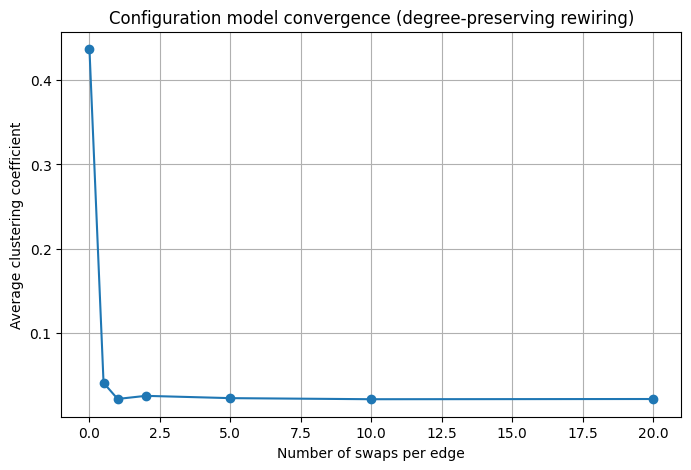

In [13]:
def test_configuration_model_convergence():
    N = 200
    k = 6
    p_ws = 0.1
    G0 = nx.watts_strogatz_graph(N, k, p_ws)

    m = G0.number_of_edges()

    # different levels of randomization: swaps per edge
    swaps_per_edge_list = [0, 0.5, 1, 2, 5, 10, 20]

    clustering_values = []

    for s in swaps_per_edge_list:
        num_swaps = int(s * m)
        G = random_edge_swap(G0, num_swaps)

        C = nx.average_clustering(G)
        clustering_values.append(C)

        print(f"swaps/edge = {s:4.1f}, swaps = {num_swaps:5d}, "
              f"avg clustering = {C:.4f}")

    plt.figure(figsize=(8, 5))
    plt.plot(swaps_per_edge_list, clustering_values, "o-")
    plt.xlabel("Number of swaps per edge")
    plt.ylabel("Average clustering coefficient")
    plt.title("Configuration model convergence (degree-preserving rewiring)")
    plt.grid(True)
    plt.show()

test_configuration_model_convergence()


## Partition Function and Probability Distribution for Networks with a Fixed Number of Edges

### Theory

We consider an ensemble of all simple undirected graphs with:
- a fixed number of nodes \(N\),
- a fixed number of edges \(M\),
- a Hamiltonian \(H(G)\) defined for each graph \(G\).

The **partition function** of this ensemble is:

$$
Z(\beta) = \sum_{G} e^{-\beta H(G)},
$$

where the sum runs over all graphs with exactly \(M\) edges.
This defines the **Boltzmann probability distribution** over graphs:

$$
P(G) = \frac{e^{-\beta H(G)}}{Z(\beta)}.
$$

For small \(N\), we can enumerate all such graphs exactly and compute \(Z\) without approximation.

---

### Code explanation

1. `all_graphs_fixed_edges(N, M)`
   Generates **all simple graphs** with \(N\) nodes and exactly \(M\) edges by taking all \(M\)-element subsets of possible edges.

2. `example_hamiltonian(G)`
   Defines a sample Hamiltonian
   \( H(G) = -J \times (\text{number of triangles}) \).
   You can replace this with any other energy function.

3. `compute_partition_function_and_distribution(...)`
   - enumerates all graphs,
   - computes their energies,
   - evaluates Boltzmann weights \(e^{-\beta H(G)}\),
   - calculates the partition function
     \( Z = \sum_G e^{-\beta H(G)} \),
   - computes the normalized probabilities
     \( P(G) = e^{-\beta H(G)} / Z \).

4. The last cell prints the partition function and, for each graph, its:
   - energy \(H(G)\),
   - probability \(P(G)\).

This provides an exact statistical-mechanical description of the graph ensemble for small \(N\).


Partition function Z = 330.279728

List of all graphs with energies and probabilities:

Graph  0 | H = -0.000 | P(G) = 0.003028
Graph  1 | H = -1.000 | P(G) = 0.008230
Graph  2 | H = -1.000 | P(G) = 0.008230
Graph  3 | H = -0.000 | P(G) = 0.003028
Graph  4 | H = -1.000 | P(G) = 0.008230
Graph  5 | H = -0.000 | P(G) = 0.003028
Graph  6 | H = -0.000 | P(G) = 0.003028
Graph  7 | H = -1.000 | P(G) = 0.008230
Graph  8 | H = -0.000 | P(G) = 0.003028
Graph  9 | H = -1.000 | P(G) = 0.008230
Graph 10 | H = -0.000 | P(G) = 0.003028
Graph 11 | H = -1.000 | P(G) = 0.008230
Graph 12 | H = -0.000 | P(G) = 0.003028
Graph 13 | H = -1.000 | P(G) = 0.008230
Graph 14 | H = -1.000 | P(G) = 0.008230
Graph 15 | H = -1.000 | P(G) = 0.008230
Graph 16 | H = -1.000 | P(G) = 0.008230
Graph 17 | H = -1.000 | P(G) = 0.008230
Graph 18 | H = -0.000 | P(G) = 0.003028
Graph 19 | H = -0.000 | P(G) = 0.003028
Graph 20 | H = -0.000 | P(G) = 0.003028
Graph 21 | H = -0.000 | P(G) = 0.003028
Graph 22 | H = -0.000 | P(G) = 0

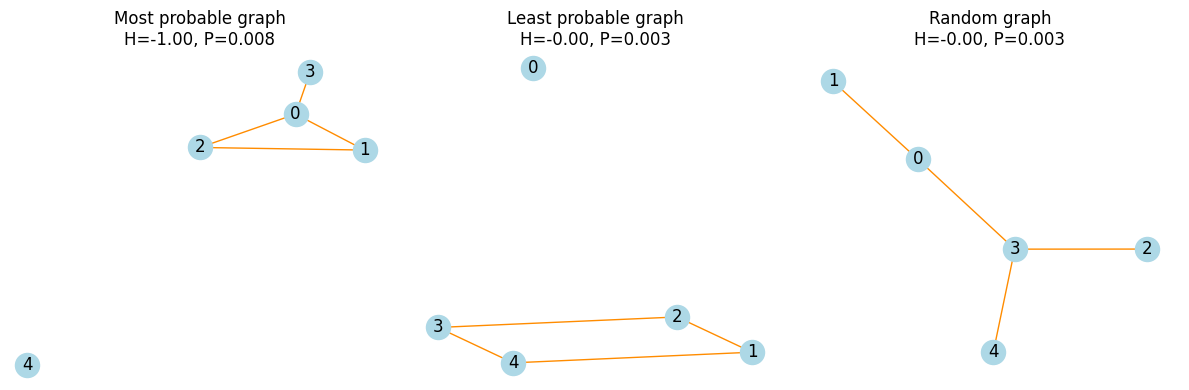

In [6]:
import itertools
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


def all_graphs_fixed_edges(N, M):
    nodes = list(range(N))
    possible_edges = list(itertools.combinations(nodes, 2))

    if M > len(possible_edges):
        raise ValueError("M is larger than the total possible edges")

    for edge_subset in itertools.combinations(possible_edges, M):
        G = nx.Graph()
        G.add_nodes_from(nodes)
        G.add_edges_from(edge_subset)
        yield G


def example_hamiltonian(G, J=1.0):
    triangles_per_node = nx.triangles(G)
    num_triangles = sum(triangles_per_node.values()) / 3
    return -J * num_triangles


def compute_partition_function_and_distribution(N, M, beta, H_func):
    energies = []
    graphs = []

    for G in all_graphs_fixed_edges(N, M):
        E = H_func(G)
        energies.append(E)
        graphs.append(G)

    energies = np.array(energies, dtype=float)
    boltz_weights = np.exp(-beta * energies)

    Z = boltz_weights.sum()
    probs = boltz_weights / Z

    return Z, energies, probs, graphs


N = 5
M = 4
beta = 1.0

Z, energies, probs, graphs = compute_partition_function_and_distribution(
    N=N, M=M, beta=beta, H_func=example_hamiltonian
)

print(f"Partition function Z = {Z:.6f}")
print("\nList of all graphs with energies and probabilities:\n")

for i, (E, p) in enumerate(zip(energies, probs)):
    print(f"Graph {i:2d} | H = {E:6.3f} | P(G) = {p:.6f}")


indices_sorted = np.argsort(-probs)
idx_best = indices_sorted[0]
idx_worst = indices_sorted[-1]
idx_random = np.random.randint(0, len(graphs))

example_indices = [
    ("Most probable graph", idx_best),
    ("Least probable graph", idx_worst),
    ("Random graph", idx_random),
]

plt.figure(figsize=(12, 4))

for k, (title, idx) in enumerate(example_indices):
    plt.subplot(1, 3, k + 1)
    nx.draw_networkx(
        graphs[idx],
        node_color="lightblue",
        edge_color="darkorange",
        with_labels=True
    )
    plt.title(f"{title}\nH={energies[idx]:.2f}, P={probs[idx]:.3f}")
    plt.axis("off")

plt.tight_layout()
plt.show()
